In [0]:
import networkx as nx
import matplotlib.pyplot as plt

from functools import reduce
from graphframes import GraphFrame
from pyspark.sql.functions import col, lit

In [0]:
vertices = spark.createDataFrame([("NYC", "New York City", 103),
                                  ("EUG", "Eugene", 65),
                                  ("AMW", "Ames", 35),
                                  ("AUS", "Austin", 46),
                                  ("BOS", "Boston", 57),
                                  ("SEA", "Seattle", 10),
                                  ("SFO", "San Francisco", 10),
                                  ("RDM", "Bend", 70),
                                  ("PDX", "Portland", 3)], ["id", "airport_name", "total_flights"])

In [0]:
edges = spark.createDataFrame([("NYC", "EUG", 33),
                               ("EUG", "AMW", -10),
                               ("AMW", "EUG", 0),
                               ("PDX", "AMW", 0),
                               ("BOS", "NYC", 44),
                               ("NYC", "BOS", 18),
                               ("NYC", "SFO", 9),
                               ("AUS", "PDX", -5),
                               ("BOS", "PDX", 3),
                               ("RDM", "PDX", -2),
                               ("SEA", "SFO", 5),
                               ("RDM", "SEA", 10),
                               ("SEA", "NYC", 35),
                               ("SFO", "RDM", 25)], ["src", "dst", "delay"])

In [0]:
flight_routes = GraphFrame(vertices, edges)

In [0]:
def plot_directed_graph(gf):
  
  gplot = nx.DiGraph()
  edge_labels = {}
  
  plt.figure(figsize=(6, 7))
  for node in gf.vertices.select('id').take(1000):
    gplot.add_node(node['id'])

  for row in gf.edges.select('src', 'dst', 'delay').take(1000):
    gplot.add_edge(row['src'], row['dst'])
    edge_labels[(row['src'], row['dst'])] = row['delay']
       
  pos = nx.shell_layout(gplot)
  
  nx.draw(gplot,
          pos,
          with_labels=True, 
          font_weight='bold', 
          node_size=1800, 
          font_size=15, 
          width=2)
    
  nx.draw_networkx_edge_labels(gplot,
                               pos,
                               edge_labels=edge_labels,
                               font_color='green',
                               font_size=10,
                               font_weight='bold')

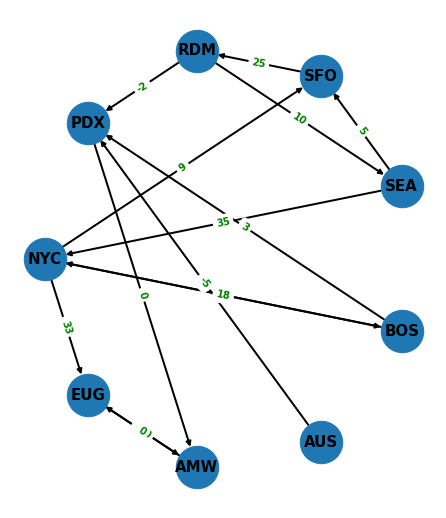

In [0]:
plot_directed_graph(flight_routes)

In [0]:
direct_flights = flight_routes.find("(a)-[e]->(b)")

direct_flights.display()

a,e,b
"List(NYC, New York City, 103)","List(NYC, EUG, 33)","List(EUG, Eugene, 65)"
"List(AMW, Ames, 35)","List(AMW, EUG, 0)","List(EUG, Eugene, 65)"
"List(SEA, Seattle, 10)","List(SEA, NYC, 35)","List(NYC, New York City, 103)"
"List(BOS, Boston, 57)","List(BOS, NYC, 44)","List(NYC, New York City, 103)"
"List(PDX, Portland, 3)","List(PDX, AMW, 0)","List(AMW, Ames, 35)"
"List(EUG, Eugene, 65)","List(EUG, AMW, -10)","List(AMW, Ames, 35)"
"List(NYC, New York City, 103)","List(NYC, BOS, 18)","List(BOS, Boston, 57)"
"List(RDM, Bend, 70)","List(RDM, SEA, 10)","List(SEA, Seattle, 10)"
"List(SFO, San Francisco, 10)","List(SFO, RDM, 25)","List(RDM, Bend, 70)"
"List(RDM, Bend, 70)","List(RDM, PDX, -2)","List(PDX, Portland, 3)"


In [0]:
direct_flights = flight_routes.find("(source)-[edge]->(destination)")

direct_flights.display()

source,edge,destination
"List(NYC, New York City, 103)","List(NYC, EUG, 33)","List(EUG, Eugene, 65)"
"List(AMW, Ames, 35)","List(AMW, EUG, 0)","List(EUG, Eugene, 65)"
"List(SEA, Seattle, 10)","List(SEA, NYC, 35)","List(NYC, New York City, 103)"
"List(BOS, Boston, 57)","List(BOS, NYC, 44)","List(NYC, New York City, 103)"
"List(PDX, Portland, 3)","List(PDX, AMW, 0)","List(AMW, Ames, 35)"
"List(EUG, Eugene, 65)","List(EUG, AMW, -10)","List(AMW, Ames, 35)"
"List(NYC, New York City, 103)","List(NYC, BOS, 18)","List(BOS, Boston, 57)"
"List(RDM, Bend, 70)","List(RDM, SEA, 10)","List(SEA, Seattle, 10)"
"List(SFO, San Francisco, 10)","List(SFO, RDM, 25)","List(RDM, Bend, 70)"
"List(RDM, Bend, 70)","List(RDM, PDX, -2)","List(PDX, Portland, 3)"


In [0]:
direct_flights.select('source.airport_name', 'destination.airport_name', 'edge.delay').display()

airport_name,airport_name,delay
New York City,Eugene,33
Ames,Eugene,0
Seattle,New York City,35
Boston,New York City,44
Portland,Ames,0
Eugene,Ames,-10
New York City,Boston,18
Bend,Seattle,10
San Francisco,Bend,25
Bend,Portland,-2


In [0]:
direct_connection = flight_routes.find("(source)-[]->(destination)")

direct_connection.display()

source,destination
"List(NYC, New York City, 103)","List(EUG, Eugene, 65)"
"List(AMW, Ames, 35)","List(EUG, Eugene, 65)"
"List(SEA, Seattle, 10)","List(NYC, New York City, 103)"
"List(BOS, Boston, 57)","List(NYC, New York City, 103)"
"List(PDX, Portland, 3)","List(AMW, Ames, 35)"
"List(EUG, Eugene, 65)","List(AMW, Ames, 35)"
"List(NYC, New York City, 103)","List(BOS, Boston, 57)"
"List(RDM, Bend, 70)","List(SEA, Seattle, 10)"
"List(SFO, San Francisco, 10)","List(RDM, Bend, 70)"
"List(RDM, Bend, 70)","List(PDX, Portland, 3)"


In [0]:
direct_connection.filter('source.id = "SEA"').display()

source,destination
"List(SEA, Seattle, 10)","List(NYC, New York City, 103)"
"List(SEA, Seattle, 10)","List(SFO, San Francisco, 10)"


In [0]:
outgoing_flights = flight_routes.find("(source)-[edge]->()")

outgoing_flights.display()

source,edge
"List(AMW, Ames, 35)","List(AMW, EUG, 0)"
"List(AUS, Austin, 46)","List(AUS, PDX, -5)"
"List(BOS, Boston, 57)","List(BOS, NYC, 44)"
"List(BOS, Boston, 57)","List(BOS, PDX, 3)"
"List(EUG, Eugene, 65)","List(EUG, AMW, -10)"
"List(NYC, New York City, 103)","List(NYC, EUG, 33)"
"List(NYC, New York City, 103)","List(NYC, BOS, 18)"
"List(NYC, New York City, 103)","List(NYC, SFO, 9)"
"List(PDX, Portland, 3)","List(PDX, AMW, 0)"
"List(RDM, Bend, 70)","List(RDM, PDX, -2)"


In [0]:
outgoing_flights.groupby('source.airport_name').agg({'edge.delay': 'avg'}).display()

airport_name,avg(edge.delay AS `delay`)
Bend,4.0
San Francisco,25.0
Ames,0.0
Portland,0.0
Austin,-5.0
Seattle,20.0
New York City,20.0
Eugene,-10.0
Boston,23.5


In [0]:
outgoing_flights.groupby('source.airport_name').agg({'edge.delay': 'max'}).display()

airport_name,max(edge.delay AS `delay`)
Bend,10
San Francisco,25
Ames,0
Portland,0
Austin,-5
Seattle,35
New York City,33
Eugene,-10
Boston,44


In [0]:
incoming_flights = flight_routes.find("()-[edge]->(destination)")

incoming_flights.display()

edge,destination
"List(EUG, AMW, -10)","List(AMW, Ames, 35)"
"List(PDX, AMW, 0)","List(AMW, Ames, 35)"
"List(NYC, BOS, 18)","List(BOS, Boston, 57)"
"List(NYC, EUG, 33)","List(EUG, Eugene, 65)"
"List(AMW, EUG, 0)","List(EUG, Eugene, 65)"
"List(BOS, NYC, 44)","List(NYC, New York City, 103)"
"List(SEA, NYC, 35)","List(NYC, New York City, 103)"
"List(AUS, PDX, -5)","List(PDX, Portland, 3)"
"List(BOS, PDX, 3)","List(PDX, Portland, 3)"
"List(RDM, PDX, -2)","List(PDX, Portland, 3)"


In [0]:
incoming_flights.groupby('destination.airport_name').agg({'edge.delay': 'avg'}).display()

airport_name,avg(edge.delay AS `delay`)
Bend,25.0
San Francisco,7.0
Ames,-5.0
Portland,-1.3333333333333333
Seattle,10.0
New York City,39.5
Eugene,16.5
Boston,18.0


In [0]:
incoming_flights.groupby('destination.airport_name').agg({'edge.delay': 'min'}).display()

airport_name,min(edge.delay AS `delay`)
Bend,25
San Francisco,5
Ames,-10
Portland,-5
Seattle,10
New York City,35
Eugene,0
Boston,18


In [0]:
no_flights = flight_routes.find("!(source)-[]->(destination)")

no_flights.display()

source,destination
"List(AUS, Austin, 46)","List(NYC, New York City, 103)"
"List(EUG, Eugene, 65)","List(SEA, Seattle, 10)"
"List(AMW, Ames, 35)","List(AMW, Ames, 35)"
"List(AUS, Austin, 46)","List(RDM, Bend, 70)"
"List(NYC, New York City, 103)","List(NYC, New York City, 103)"
"List(PDX, Portland, 3)","List(SFO, San Francisco, 10)"
"List(SEA, Seattle, 10)","List(RDM, Bend, 70)"
"List(SFO, San Francisco, 10)","List(AUS, Austin, 46)"
"List(BOS, Boston, 57)","List(EUG, Eugene, 65)"
"List(SFO, San Francisco, 10)","List(BOS, Boston, 57)"


TODO Recording for cell below

- Please note that the next two queries are both errors
- Please expand the error and show the details

In [0]:
no_flights = flight_routes.find("!(source)-[edge]->(destination)")

no_flights.display()

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-29929024203955> in <module> 
 ----> 1 no_flights = flight_routes . find ( "!(source)-[edge]->(destination)" ) 
 2 
 3 no_flights . display ( ) 

 /local_disk0/spark-e13fad79-de60-44d6-9f68-3885a2f2e171/userFiles-343e30a0-ac32-4da3-aeca-9636bb82e599/addedFile3704136123809185873graphframes_0_8_1_spark3_0_s_2_12-7fc2e.jar/graphframes/graphframe.py in find (self, pattern) 
 206 : return : DataFrame with one Row for each instance of the motif found
 207 """
 --> 208 jdf = self . _jvm_graph . find ( pattern ) 
 209 return DataFrame ( jdf , self . _sqlContext ) 
 210 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 115 def deco ( * a , ** kw ) : 
 116 try : 
 --> 117 return f ( * a , ** kw ) 
 118 except py4j . protocol . Py4JJavaError as e : 
 119 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling o447.find.
: org.graphframes.InvalidParseException: Motif finding does not support negated named edges, but the given pattern contained: !(NamedVertex(source))-[edge]->(NamedVertex(destination))
	at org.graphframes.pattern.Pattern$.$anonfun$assertValidPatterns$1(patterns.scala:107)
	at org.graphframes.pattern.Pattern$.$anonfun$assertValidPatterns$1$adapted(patterns.scala:102)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at org.graphframes.pattern.Pattern$.assertValidPatterns(patterns.scala:102)
	at org.graphframes.pattern.Pattern$.parse(patterns.scala:59)
	at org.graphframes.GraphFrame.find(GraphFrame.scala:332)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:
anywhere_to_anywhere = flight_routes.find("()-[]->()")

anywhere_to_anywhere.display()

--------------------------------------------------------------------------- 
 Py4JJavaError Traceback (most recent call last)
 <command-29929024203977> in <module> 
 ----> 1 anywhere_to_anywhere = flight_routes . find ( "()-[]->()" ) 
 2 
 3 anywhere_to_anywhere . display ( ) 

 /local_disk0/spark-e13fad79-de60-44d6-9f68-3885a2f2e171/userFiles-343e30a0-ac32-4da3-aeca-9636bb82e599/addedFile3704136123809185873graphframes_0_8_1_spark3_0_s_2_12-7fc2e.jar/graphframes/graphframe.py in find (self, pattern) 
 206 : return : DataFrame with one Row for each instance of the motif found
 207 """
 --> 208 jdf = self . _jvm_graph . find ( pattern ) 
 209 return DataFrame ( jdf , self . _sqlContext ) 
 210 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 115 def deco ( * a , ** kw ) : 
 116 try : 
 --> 117 return f ( * a , ** kw ) 
 118 except py4j . protocol . Py4JJavaError as e : 
 119 converted = convert_exception ( e . java_exception ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py in get_return_value (answer, gateway_client, target_id, name) 
 324 value = OUTPUT_CONVERTER [ type ] ( answer [ 2 : ] , gateway_client ) 
 325 if answer [ 1 ] == REFERENCE_TYPE : 
 --> 326 raise Py4JJavaError(
 327 "An error occurred while calling {0}{1}{2}.\n" . 
 328 format(target_id, ".", name), value)

 Py4JJavaError : An error occurred while calling o447.find.
: org.graphframes.InvalidParseException: Motif finding does not support completely anonymous edges ()-[]->(). Users can check for the existence of edges in the graph using the edges DataFrame.
	at org.graphframes.pattern.Pattern$.$anonfun$assertValidPatterns$1(patterns.scala:118)
	at org.graphframes.pattern.Pattern$.$anonfun$assertValidPatterns$1$adapted(patterns.scala:102)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at org.graphframes.pattern.Pattern$.assertValidPatterns(patterns.scala:102)
	at org.graphframes.pattern.Pattern$.parse(patterns.scala:59)
	at org.graphframes.GraphFrame.find(GraphFrame.scala:332)
	at sun.reflect.GeneratedMethodAccessor583.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

TODO Recording for cell below

- Please make sure that you scroll all the way to the right on the data frame to show all the rows
- Many of the results in the cells below will require your scrolling, please make sure to do in all cases

In [0]:
flight_data = spark.read.format("csv") \
                        .option("header", "true") \
                        .option("inferSchema", "true") \
                        .load("/databricks-datasets/asa/airlines/2005.csv")

flight_data.display()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2005,1,28,5,1603,1605,1741,1759,UA,541,N935UA,158,174,131,-18,-2,BOS,ORD,867,4,23,0,null,0,0,0,0,0,0
2005,1,29,6,1559,1605,1736,1759,UA,541,N941UA,157,174,136,-23,-6,BOS,ORD,867,6,15,0,null,0,0,0,0,0,0
2005,1,30,7,1603,1610,1741,1805,UA,541,N342UA,158,175,131,-24,-7,BOS,ORD,867,9,18,0,null,0,0,0,0,0,0
2005,1,31,1,1556,1605,1726,1759,UA,541,N326UA,150,174,129,-33,-9,BOS,ORD,867,11,10,0,null,0,0,0,0,0,0
2005,1,2,7,1934,1900,2235,2232,UA,542,N902UA,121,152,106,3,34,ORD,BOS,867,5,10,0,null,0,0,0,0,0,0
2005,1,3,1,2042,1900,9,2232,UA,542,N904UA,147,152,97,97,102,ORD,BOS,867,3,47,0,null,0,23,0,0,0,74
2005,1,4,2,2046,1900,2357,2232,UA,542,N942UA,131,152,100,85,106,ORD,BOS,867,5,26,0,null,0,46,0,0,0,39
2005,1,5,3,NA,1900,NA,2232,UA,542,000000,NA,152,NA,NA,NA,ORD,BOS,867,0,0,1,B,0,0,0,0,0,0
2005,1,6,4,2110,1900,8,2223,UA,542,N920UA,118,143,101,105,130,ORD,BOS,867,2,15,0,null,0,16,0,0,0,89
2005,1,7,5,1859,1900,2235,2223,UA,542,N340UA,156,143,96,12,-1,ORD,BOS,867,4,56,0,null,0,0,0,0,0,0


In [0]:
origins = flight_data.select('Origin').distinct().withColumnRenamed('Origin', 'City')

origins.count()

Out[46]: 286

In [0]:
destinations = flight_data.select('Dest').distinct().withColumnRenamed('Dest', 'City')

destinations.count()

Out[47]: 289

In [0]:
vertices = origins.union(destinations).select('City').distinct().withColumnRenamed('City', 'id')

vertices.count()

Out[49]: 290

In [0]:
vertices.display()

id
BGM
DLG
PSE
MSY
GEG
BUR
SNA
GRB
GTF
IDA


In [0]:
routes = flight_data.select('Origin', 'Dest', 'AirTime', 'ArrDelay', 'DepDelay', 'Cancelled', 'Diverted')

routes.display()

Origin,Dest,AirTime,ArrDelay,DepDelay,Cancelled,Diverted
BOS,ORD,131,-18,-2,0,0
BOS,ORD,136,-23,-6,0,0
BOS,ORD,131,-24,-7,0,0
BOS,ORD,129,-33,-9,0,0
ORD,BOS,106,3,34,0,0
ORD,BOS,97,97,102,0,0
ORD,BOS,100,85,106,0,0
ORD,BOS,NA,NA,NA,1,0
ORD,BOS,101,105,130,0,0
ORD,BOS,96,12,-1,0,0


In [0]:
edges = routes.withColumnRenamed('Origin', 'src')\
              .withColumnRenamed('Dest', 'dst')

edges.display()

src,dst,AirTime,ArrDelay,DepDelay,Cancelled,Diverted
BOS,ORD,131,-18,-2,0,0
BOS,ORD,136,-23,-6,0,0
BOS,ORD,131,-24,-7,0,0
BOS,ORD,129,-33,-9,0,0
ORD,BOS,106,3,34,0,0
ORD,BOS,97,97,102,0,0
ORD,BOS,100,85,106,0,0
ORD,BOS,NA,NA,NA,1,0
ORD,BOS,101,105,130,0,0
ORD,BOS,96,12,-1,0,0


In [0]:
us_flight_routes = GraphFrame(vertices, edges)

In [0]:
us_direct_flights = us_flight_routes.find("(source)-[edge]->(destination)")

us_direct_flights.display()

source,edge,destination
List(BGM),"List(BGM, CVG, 80, -18, 0, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 80, -14, 0, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 92, -9, 5, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 87, -21, -6, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 85, -17, -5, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 87, 8, 0, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, NA, NA, NA, 1, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 91, 21, 13, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 106, 9, 0, 0, 0)",List(CVG)
List(BGM),"List(BGM, CVG, 96, -5, 0, 0, 0)",List(CVG)


In [0]:
us_direct_flights.filter('source.id = "PIT"').select('destination.id', 'edge.AirTime').display()

In [0]:
us_direct_flights.filter('source.id = "SFO" and edge.ArrDelay < 30').select('destination.id', 'edge.ArrDelay').display()

id,ArrDelay
MSY,-9
MSY,-2
MSY,-12
MSY,5
MSY,-4
MSY,-6
MSY,-9
MSY,-8
MSY,5
MSY,-11


In [0]:
us_direct_flights.groupby('source.id', 'destination.id').sum('edge.Cancelled').display()

id,id,sum(edge.Cancelled AS `Cancelled`)
BGM,CVG,48
DLG,ANC,11
PSE,JFK,1
MSY,CLT,64
MSY,MIA,45
MSY,ORD,88
MSY,IAD,23
MSY,DTW,30
MSY,TPA,35
MSY,MCO,36


TODO Recording for cell below

- Please scroll to the right to show all the columns

In [0]:
one_hop_flights = us_flight_routes.find("(source)-[edge_1]->(destination_1); (destination_1)-[edge_2]->(final_destination)")

one_hop_flights.display()

source,edge_1,destination_1,edge_2,final_destination
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 105, 14, 30, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 129, 61, 53, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 116, 10, 16, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 115, 0, 7, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 122, 39, 39, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 122, -33, -34, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, NA, NA, NA, 1, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 125, -3, -6, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 128, -20, -25, 0, 0)",List(AKN)
List(AKN),"List(AKN, ADK, 155, 15, 3, 0, 0)",List(ADK),"List(ADK, AKN, 113, 20, 32, 0, 0)",List(AKN)


In [0]:
# The destination of edge_1 is the source of edge_2
# Note that this also gives you flights that go to a destination and come back to the same source
# We can perform a post-hoc filter to remove these results

In [0]:
one_hop_flights.filter('source.id != final_destination.id').display()

source,edge_1,destination_1,edge_2,final_destination
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 80, -18, 0, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 80, -14, 0, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 92, -9, 5, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 87, -21, -6, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 85, -17, -5, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 87, 8, 0, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, NA, NA, NA, 1, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 91, 21, 13, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 106, 9, 0, 0, 0)",List(CVG)
List(ORD),"List(ORD, BGM, NA, NA, 11, 0, 1)",List(BGM),"List(BGM, CVG, 96, -5, 0, 0, 0)",List(CVG)


In [0]:
return_flights = us_flight_routes.find("(source)-[edge_1]->(destination); (destination)-[edge_2]->(source)")

return_flights.display()

source,edge_1,destination,edge_2
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 65, -4, -10, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 61, -5, -4, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 58, -5, -11, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 63, 1, -5, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 64, 3, -5, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 61, 108, 105, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 64, 1, -10, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 56, 15, 17, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 67, -4, -9, 0, 0)"
List(CLE),"List(CLE, ABE, 47, -13, -7, 0, 0)",List(ABE),"List(ABE, CLE, 57, 16, -10, 0, 0)"


In [0]:
return_flights.filter('edge_1.AirTime < 30 and edge_2.AirTime < 30')\
              .select('source.id', 'destination.id', 'edge_1.AirTime', 'edge_2.AirTime').display()

id,id,AirTime,AirTime
MSY,HOU,25,29
MSY,HOU,25,25
GEG,SEA,1,26
GEG,SEA,1,28
GEG,SEA,1,28
GEG,SEA,1,17
GEG,SEA,1,25
GEG,SEA,1,1
GEG,SEA,1,25
GEG,SEA,1,29


In [0]:
no_return_flights = us_flight_routes.find("(source)-[edge_1]->(destination); !(destination)-[]->(source)")

no_return_flights.display()

source,edge_1,destination
List(KOA),"List(KOA, SEA, 289, -34, -6, 0, 0)",List(SEA)
List(AKN),"List(AKN, DLG, 21, 4, 4, 0, 0)",List(DLG)
List(KOA),"List(KOA, SEA, 308, -10, -2, 0, 0)",List(SEA)
List(KOA),"List(KOA, ORD, 474, 6, -8, 0, 0)",List(ORD)
List(ANC),"List(ANC, OGG, 329, -2, 0, 0, 0)",List(OGG)
List(AKN),"List(AKN, DLG, 15, -17, -8, 0, 0)",List(DLG)
List(DEN),"List(DEN, IDA, NA, NA, -2, 0, 1)",List(IDA)
List(TLH),"List(TLH, MCO, 41, -2, 0, 0, 0)",List(MCO)
List(TLH),"List(TLH, MCO, 46, -5, -10, 0, 0)",List(MCO)
List(KOA),"List(KOA, ORD, 465, -8, -14, 0, 0)",List(ORD)
